In [40]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), "IO"))
sys.path.append(os.path.join(os.getcwd(), "Display"))

from IO.classes import CypherBatch, CypherFile
from Display.figures import FigureSinglePlot
import hystorian as hy
import numpy as np
import pandas as pd

import h5py
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

#Fix packages to figure out this. 

file successfully converted


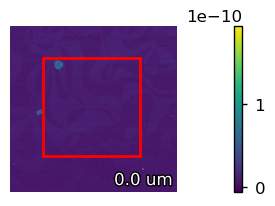

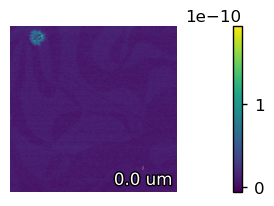

5.859375e-08
                          1
0                          
ScanSize              3e-05
FastScanSize          3e-05
SlowScanSize          3e-05
ScanRate             1.0016
XOffset                   0
YOffset                   0
PointsLines             512
ScanPoints              512
ScanLines               512
ScanAngle                90
ImagingMode         Contact
InvOLS                1e-07
SpringConstant            1
AmpInvOLS          1.09e-07
Amp2Invols            2e-08
FastRatio                 1
SlowRatio                 1
TopLine                 255
BottomLine                0
ScanMode        Closed Loop
 3e-05
 512


In [46]:
cmd = os.path.dirname(sys.path[0])
datafile = CypherFile(path=cmd, filename = 'sample_89M10000')
datafile()

figure = FigureSinglePlot(datafile, show=True, path=cmd, filename='test', extension='.pdf')
figure.Ax.plot_cAFM(datafile, key='CR')
figure.Ax.ax.plot([100, 100], [400, 100], "-r")
figure.Ax.ax.plot([100, 400], [100, 100], "-r")
figure.Ax.ax.plot([400, 400], [100, 400], "-r")
figure.Ax.ax.plot([400, 100], [400, 400], "-r")
figure()


alt_data = datafile['CR'][100:400,100:400]
figure = FigureSinglePlot(datafile, show=True, path=cmd, filename='test', extension='.pdf', data=alt_data)
figure.Ax.plot_cAFM(datafile, key='CR')
figure()

print(datafile.x_res)
meta = datafile.get_metadata()
print(meta[:20])
print(meta.loc["ScanSize", 1])
print(meta.loc["PointsLines"].item())

In [24]:
import vtk

reader = vtk.vtkDataSetReader()
reader.SetFileName(os.path.join(test_NT.path, "vtktest" + ".vtk"))
reader.Update()

data = reader.GetOutput()

points = data.GetPoints()
print(points.GetNumberOfPoints())
coords = points.GetPoint(10000)
print(points.GetData().GetTuple(0)) #RSD: Der har vi den
print(coords)

meta = data.GetMetaData()

print(meta)


# X = np.array(grid.GetPoint(i)[0] for i in range(grid.GetNumberOfPoints()))
# Y = np.array(grid.GetPoint(i)[1] for i in range(grid.GetNumberOfPoints()))
# Z = np.array(grid.GetPoint(i)[2] for i in range(grid.GetNumberOfPoints()))


27648
(0.0, 0.0, 76990560.0)
(16.04316520690918, 38.89506530761719, 80351256.0)


AttributeError: 'vtkmodules.vtkCommonDataModel.vtkStructuredGrid' object has no attribute 'GetMetaData'

In [64]:
from PIL import Image

test_NT = CypherFile(cmd, "2023.08.15_0")
with open(os.path.join(test_NT.path, test_NT.filename + ".xyz"), "r") as f:
    arr = pd.read_csv(f, sep="\t", header=None, index_col=None)

    pil = Image.open(os.path.join(test_NT.path, test_NT.filename + ".tiff"))


import matplotlib.pyplot as plt


x_dim = set(arr[0]).__len__()
y_dim = set(arr[1]).__len__()

print(x_dim)
print(y_dim)

print(arr[1].max())

# arr = arr[2].values.reshape((y_dim, x_dim))
x = np.linspace(0, arr[0].max(), x_dim) 
y = np.linspace(0, arr[1].max(), y_dim)


arr = arr[2].reshape(y_dim, x_dim)
plt.imshow(arr)

plt.colorbar()
plt.axis("off")
plt.show()

256
108
4.1767e-06


AttributeError: 'Series' object has no attribute 'reshape'

In [182]:

cmd = os.path.dirname(sys.path[0])
test = CypherFile(path=cmd, filename = 'sample_89M10000')

In [3]:
test()

file successfully converted


In [4]:
data = h5py.File(os.path.join(cmd,'sample_89M10000.hdf5'), "r")

In [5]:
def get_dataset_keys(f):
    keys = []
    f.visit(lambda key: keys.append(key) if isinstance(f[key], h5py.Dataset) else None)
    return keys

In [6]:
print(get_dataset_keys(data))

['datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/Current2Retrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/CurrentRetrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/CurrentTrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/DeflectionRetrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/HeightRetrace', 'datasets/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000/ZSensorRetrace', 'metadata/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000']


In [59]:
# dat1 = data['datasets/c:\\Users\rubensd\OneDrive - NTNU\PhD\Analysis\sample_89M10000/CurrentRetrace']
met1 = data['metadata/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000']


In [185]:
import pandas as pd
arr = np.zeros(1)
with h5py.File(os.path.join(cmd,'sample_89M10000.hdf5'), "r") as f:
    met1 = f['metadata/c:\\Users\\rubensd\\OneDrive - NTNU\\PhD\\Analysis\\sample_89M10000']
    # print(met1.attrs())
    arr = np.array(met1)#np.array(met1)#met1.attrs['Scan size'
    # ss = met1.attrs['ScanSize']

    # ss = met1.get('ScanSize')
    # print(arr.decode('utf-8'))
    # print(ss)

testb = np.array(b'Hello')

strng= arr.tolist().decode('ascii', errors='replace')

lists = strng.split('\r')
# print(lists)

df = pd.DataFrame([sub.split(":") for sub in strng.split("\r")])


# print(df.iloc[:50,:2])

print(test.get_metadata())


AttributeError: 'Dataset' object has no attribute 'tolist'

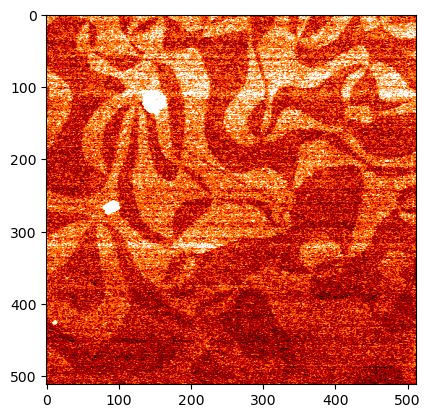

In [9]:
plt.imshow(npdat, cmap="gist_heat")
plt.clim(0, 15e-12)
plt.show()